In [1]:
import matplotlib.pyplot as plt
import seaborn as sbs

import random
import math
import numpy as np
from numpy import array

import copy


import sys, os, time

from qinfer import LiuWestResampler
from qinfer import utils

from qiskit import IBMQ
from qiskit import QuantumCircuit, execute, Aer
from qiskit.compiler import transpile
from qiskit.transpiler import PassManager

IBMQ.load_account()

from qinfer import FiniteOutcomeModel, DifferentiableModel
from qinfer.smc import SMCUpdater

sbs.set(style="darkgrid")

import matplotlib.lines as mlines

import qiskit.ignis.verification.randomized_benchmarking as rb
%matplotlib inline
from sklearn.metrics import mean_squared_error

Failed to import duecredit due to No module named 'duecredit'
/home/alan/aur/miniconda3/lib/python3.8/site-packages/IPython/parallel.py:12: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  warn("The `IPython.parallel` package has been deprecated since IPython 4.0. "
/home/alan/aur/miniconda3/lib/python3.8/site-packages/qinfer/parallel.py:61: UserWarning: Could not import IPython parallel. Parallelization support will be disabled.
  warnings.warn(


In [2]:
def design_circuit(n_qubits, inv_arr, c_len=2):
    circuit = QuantumCircuit(n_qubits, n_qubits)
    
    for _ in range(c_len):
        for i in range(n_qubits):
            circuit.barrier(i)
            circuit.x(i)
            circuit.barrier(i)
            circuit.x(i)

    
    for i, element in enumerate(inv_arr):
        if element == 1:
            circuit.barrier(i)
            circuit.x(i)
        
    circuit.measure(list(range(n_qubits)), list(range(n_qubits)))
    return circuit

In [3]:
curr_inversion_arr = [0,1,0,1]

In [4]:
provider = IBMQ.get_provider(group='open', project='main')
backend = provider.get_backend('ibmq_vigo')

results = []
shots=4000
n_qubits = 4

# Random inv array

    
circuit = design_circuit(n_qubits, curr_inversion_arr)

try:
    circuit_op_0 = transpile(circuit, backend=backend, optimization_level=0)
    job = execute(circuit_op_0, backend, shots=shots)
except:
    pass

result = job.result()

results.append([curr_inversion_arr, result.get_counts(circuit_op_0)])

KeyboardInterrupt: 

In [148]:
results_pre = results

In [144]:
results_post = results

In [141]:
def bootstrap(results, target=0, samples=900, repeats=1000):
    sampler = []
    for i in results:
        for _ in range(results[i]):
            sampler.append(i)
            
    derived_sequences = []
    empty_sequence = {}
    [empty_sequence.__setitem__(i, 0) for i in results.keys()]
    
    for _ in range(repeats):
        derived_sequence = empty_sequence.copy()
    
        for i in range(samples):
            sample = sampler[random.randint(0, len(sampler) - 1)]
            derived_sequence[sample] += 1
        
        derived_sequences.append(derived_sequence)
        
    return derived_sequences

In [129]:
results

[[[0, 1, 0, 1],
  {'0101': 1,
   '0001': 36,
   '0100': 44,
   '0111': 1,
   '1110': 1,
   '0011': 6,
   '0110': 7,
   '1000': 44,
   '0010': 45,
   '0000': 3813,
   '1001': 2}]]

In [178]:
n_repeats = 100
samples = 100

y_coords_pre = np.array([i / samples for j in bootstrap(results_pre[0][1], repeats=n_repeats, samples=samples) for i in j.values()]).flatten()
x_coords_pre = np.array([range(len(results_pre[0][1])) for _ in range(n_repeats)]).flatten()

y_coords_post = np.array([i / samples for j in bootstrap(results_post[0][1], repeats=n_repeats, samples=samples) for i in j.values()]).flatten()
x_coords_post = np.array([range(len(results_post[0][1])) for _ in range(n_repeats)]).flatten()


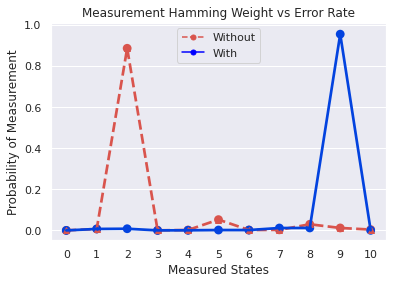

In [183]:
fig = plt.figure()
ax = sbs.pointplot(x_coords_pre, y_coords_pre, ci=100, label="Without", 
                   color=sbs.xkcd_rgb["pale red"], marker='.', markersize=7)

ax.lines[0].set_marker('^')
ax.lines[0].set_linestyle('--')

sbs.pointplot(x_coords_post, y_coords_post, ci=100, label="With", color=sbs.xkcd_rgb["blue"], ax=ax, markersize=7)
plt.xlabel("Measured States")
plt.ylabel("Probability of Measurement")

virgo = mlines.Line2D([], [], color=sbs.xkcd_rgb["pale red"], marker='.', linestyle='--',
                          markersize=10, label='Without')
london = mlines.Line2D([], [], color='blue', marker='.',
                          markersize=10, label='With')

plt.legend(handles=[virgo, london])

plt.title("Measurement Hamming Weight vs Error Rate")
plt.savefig('figs/demonstration.pdf')

TypeError: errorbar() missing 1 required positional argument: 'y'

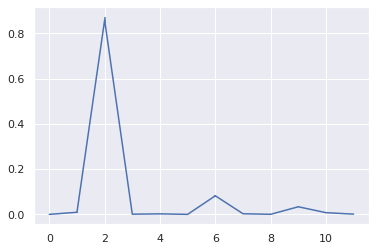

In [125]:
plt.errorbar(x=list(range(len(values_old))), y=np.array(values_old) / sum(values_old), yerr = errors(values_old),  label='Post Adaptive Inversion')
plt.errorbar(np.array(values_new) / sum(values_new), label='Pre Adaptive Inversion')
plt.xlabel('States')
plt.ylabel('Probability')
plt.legend()

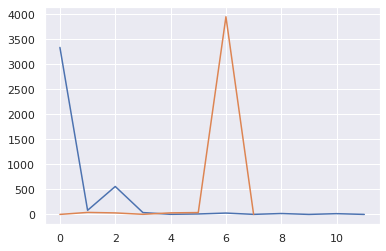

In [57]:
initial = [results[0][1][i] for i in results[0][1]]
values_new, axis_new = list(results[0][1].values()), list(results[0][1].keys())

plt.plot(values_old)
plt.plot(values_new)

In [13]:
plt.plot(results[1])

IndexError: list index out of range

In [12]:
results

[[array([1, 0, 1, 0]),
  {'0101': 811,
   '0001': 26,
   '0100': 135,
   '0111': 11,
   '0011': 1,
   '0110': 2,
   '1101': 9,
   '1100': 1,
   '0010': 2,
   '0000': 2}]]